In [ ]:
!pip install --upgrade umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.0 MB/s eta 0:00:00


In [ ]:
import os                         # for file locations
import matplotlib.pyplot as plt   # for plotting
import numpy as np                # arrays
import pickle                     # saving python objects
import pandas as pd               # dataframes
import tables

# colours for printing outputs
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [ ]:

import gdown
FILE_PATH = 'UPennMayo_features.hdf5'

if not os.path.exists(FILE_PATH):
    gdown.download('https://drive.google.com/uc?id=1-0Y0eKW9hIeOdKlYbi9UAojERKbQzi5d',
                './'+FILE_PATH, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1-0Y0eKW9hIeOdKlYbi9UAojERKbQzi5d
To: /content/UPennMayo_features.hdf5
100%|██████████| 47.9M/47.9M [00:00<00:00, 161MB/s]


In [ ]:
# load features dataframe
h5file = tables.open_file(FILE_PATH, mode="r+")
h5file

File(filename=UPennMayo_features.hdf5, title='Upenn Features', mode='r+', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) 'Upenn Features'
/Patient_2 (Group) 'Participant Data'
/Patient_2/Data_x (EArray(7035, 848)) 'Feature Array'
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (9, 848)
/Patient_2/Data_x_Feat_Names (Array(848,)) 'Names of Each Feature'
  atom := StringAtom(itemsize=29, shape=(), dflt=b'')
  maindim := 0
  flavor := 'numpy'
  byteorder := 'irrelevant'
  chunkshape := None
/Patient_2/Data_y (EArray(7035, 1)) 'Events Array'
  atom := Int64Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (8192, 1)

In [ ]:
data_x = h5file.get_node('/Patient_2/Data_x')
data_y = h5file.get_node('/Patient_2/Data_y')
data_x_labels = h5file.get_node('/Patient_2/Data_x_Feat_Names')

part_feature_df = pd.DataFrame(data_x[:], columns = data_x_labels[:].astype(str))
part_feature_df['class'] = data_y[:]
part_feature_df = part_feature_df.set_index('class')
part_feature_df.head()

,LMacro_01|2_4Hz,LMacro_01|4_8Hz,LMacro_01|8_12Hz,LMacro_01|12_30Hz,LMacro_01|30_70Hz,LMacro_01|Ratio_3_12/2_30Hz,LMacro_01|D6_mean,LMacro_01|D5_mean,LMacro_01|D4_mean,LMacro_01|D3_mean,...,RMacro_04_RMacro_05|time_corr,RMacro_04_RMacro_06|time_corr,RMacro_04_RMacro_07|time_corr,RMacro_04_RMacro_08|time_corr,RMacro_05_RMacro_06|time_corr,RMacro_05_RMacro_07|time_corr,RMacro_05_RMacro_08|time_corr,RMacro_06_RMacro_07|time_corr,RMacro_06_RMacro_08|time_corr,RMacro_07_RMacro_08|time_corr
class,,,,,,,,,,,,,,,,,,,,,
1,227.771604,121.729376,104.748192,12.558394,0.647189,0.236310,-1.464481,-0.824742,0.013091,0.079837,...,0.273753,0.363735,0.389202,0.297462,0.789810,0.652605,0.519944,0.953851,0.796902,0.888274
1,162.957202,77.334727,39.298664,159.289935,17.511810,0.521757,-0.524147,-2.195927,0.170249,0.077665,...,0.402350,0.379938,0.046323,-0.029894,0.765875,0.426919,0.379509,0.808733,0.732159,0.911896
1,7.328949,42.812358,74.461760,98.214038,8.702826,0.631694,4.117210,-0.597011,-0.399529,0.090689,...,-0.020415,-0.103571,-0.071538,-0.048586,0.807652,0.638780,0.563594,0.936139,0.864730,0.954777
1,213.279844,85.966538,48.585487,241.390643,19.657826,1.773919,1.079959,0.292291,0.022378,0.049902,...,-0.194032,-0.129580,0.018119,0.232352,0.842868,0.673148,0.445052,0.857085,0.559804,0.861035
1,44.163924,27.442250,42.136054,177.165579,15.002302,1.353723,-1.712907,1.431398,-0.246839,-0.003639,...,0.099375,0.115953,0.158055,0.105109,0.680998,0.362963,0.242693,0.834629,0.653866,0.911919


In [ ]:
reduced_features = part_feature_df.loc[[0,1]]
reduced_features.head()

,LMacro_01|2_4Hz,LMacro_01|4_8Hz,LMacro_01|8_12Hz,LMacro_01|12_30Hz,LMacro_01|30_70Hz,LMacro_01|Ratio_3_12/2_30Hz,LMacro_01|D6_mean,LMacro_01|D5_mean,LMacro_01|D4_mean,LMacro_01|D3_mean,...,RMacro_04_RMacro_05|time_corr,RMacro_04_RMacro_06|time_corr,RMacro_04_RMacro_07|time_corr,RMacro_04_RMacro_08|time_corr,RMacro_05_RMacro_06|time_corr,RMacro_05_RMacro_07|time_corr,RMacro_05_RMacro_08|time_corr,RMacro_06_RMacro_07|time_corr,RMacro_06_RMacro_08|time_corr,RMacro_07_RMacro_08|time_corr
class,,,,,,,,,,,,,,,,,,,,,
0,114.541010,26.387061,11.821119,1.357175,0.127231,0.080726,-0.128602,0.118216,-0.101168,-0.033279,...,-0.303116,-0.431413,-0.376480,-0.411506,0.544665,0.179166,0.469152,0.890269,0.827349,0.822477
0,27.574621,43.245174,18.910574,0.791160,0.113143,0.028620,-0.566416,-0.064466,-0.082230,0.007399,...,-0.427137,-0.388867,-0.327155,-0.370580,0.750489,0.593814,0.665086,0.956724,0.870345,0.912751
0,58.207500,18.142876,8.238157,1.537487,0.341276,0.179073,0.500630,-0.156088,0.016892,0.061672,...,0.121037,0.126031,0.092073,-0.025342,0.779517,0.483535,0.452129,0.887166,0.724896,0.718923
0,142.960698,11.285728,13.005110,1.014406,0.283393,0.118613,-0.823890,0.296830,0.030066,-0.039112,...,0.119059,0.116303,0.282626,0.113695,0.737446,0.529281,0.288499,0.719412,0.648070,0.786587
0,221.105230,39.302649,28.439736,3.143172,0.317358,0.072439,0.119001,0.103982,-0.235290,-0.002702,...,-0.272180,0.054720,-0.089779,0.077794,0.721609,0.470620,0.344036,0.810304,0.774646,0.820247


In [ ]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.2
RANDOM_STATE = 0

# turn to numpy array
data_x = reduced_features.values

# create condition(group) array
data_y = reduced_features.index.values

X_train, X_test, y_train, y_test = train_test_split(data_x,
                                                    data_y,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2512, 848) (629, 848) (2512,) (629,)


In [ ]:
%%time
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score

pipe_svc = Pipeline([('scl', StandardScaler()),
                     ('clf', LinearSVC(random_state=RANDOM_STATE,
                                       class_weight = 'balanced',
                                       penalty='l2',
                                       dual=False))])

N_SPLITS = 10

StratKFold = StratifiedKFold(n_splits = N_SPLITS,
                             shuffle=True, # changed to True to enable shuffling
                             random_state=RANDOM_STATE)

scores = cross_val_score(estimator=pipe_svc,
                         X=X_train,
                         y=y_train,
                         scoring = 'f1',
                         cv=StratKFold,
                         n_jobs=-1)

print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.88888889 0.92307692 1.         0.88       0.86956522 1.
 0.91666667 0.91666667 0.96       0.95652174]
CV accuracy: 0.931 +/- 0.044
CPU times: user 653 ms, sys: 202 ms, total: 856 ms
Wall time: 59.4 s


In [ ]:
from sklearn.feature_selection import VarianceThreshold
from itertools import compress
from collections import defaultdict
import pprint
pp = pprint.PrettyPrinter()

sel = VarianceThreshold(threshold=.8)
sel.fit(X_train)

# get boolian list of what is kept and what not
keep_bool = sel.get_support()
# get index of false values
remove_index = [i for i, x in enumerate(keep_bool) if not x]

# merge multiindex feature labels into 1 label list
feat_labels = reduced_features.columns
remove_list = list(feat_labels[remove_index])

print(color.BOLD+color.UNDERLINE+'Features and Channels Removed ('+str(len(remove_index))+')\n'+color.END)
pp.pprint(remove_list)


Features and Channels Removed (488)

['LMacro_01|Ratio_3_12/2_30Hz',
 'LMacro_01|D4_mean',
 'LMacro_01|D3_mean',
 'LMacro_01|D2_mean',
 'LMacro_01|D1_mean',
 'LMacro_01|D2_std',
 'LMacro_01|D1_std',
 'LMacro_01|D6_ratio',
 'LMacro_01|D5_ratio',
 'LMacro_01|D4_ratio',
 'LMacro_01|D3_ratio',
 'LMacro_01|D2_ratio',
 'LMacro_01|D1_ratio',
 'LMacro_01|D2_mean_abs',
 'LMacro_01|D1_mean_abs',
 'LMacro_02|Ratio_3_12/2_30Hz',
 'LMacro_02|D4_mean',
 'LMacro_02|D3_mean',
 'LMacro_02|D2_mean',
 'LMacro_02|D1_mean',
 'LMacro_02|D2_std',
 'LMacro_02|D1_std',
 'LMacro_02|D6_ratio',
 'LMacro_02|D5_ratio',
 'LMacro_02|D4_ratio',
 'LMacro_02|D3_ratio',
 'LMacro_02|D2_ratio',
 'LMacro_02|D1_ratio',
 'LMacro_02|D2_mean_abs',
 'LMacro_02|D1_mean_abs',
 'LMacro_03|Ratio_3_12/2_30Hz',
 'LMacro_03|D4_mean',
 'LMacro_03|D3_mean',
 'LMacro_03|D2_mean',
 'LMacro_03|D1_mean',
 'LMacro_03|D2_std',
 'LMacro_03|D1_std',
 'LMacro_03|D6_ratio',
 'LMacro_03|D5_ratio',
 'LMacro_03|D4_ratio',
 'LMacro_03|D3_ratio',
 'LMa

In [ ]:
%%time
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.svm import SVC

# set the random state
np.random.seed(seed=RANDOM_STATE)
indices = np.random.randint(0,X_train.shape[1],5)
X_train_reduced = X_train[:,indices]

pipe_svc_linear = Pipeline([('scl', StandardScaler()),
                            ('clf', SVC(kernel='linear',
                                        class_weight = 'balanced',
                                        random_state=RANDOM_STATE))])

efs = ExhaustiveFeatureSelector(pipe_svc_linear,
                                min_features=1,
                                max_features=4,
                                print_progress=False,
                                scoring='f1',
                                cv=StratKFold,
                                n_jobs=-1,
                                clone_estimator=True)

# Fit the ExhaustiveFeatureSelector without custom_feature_names
efs.fit(X_train_reduced, y_train)

# Create a DataFrame from the metric dictionary
df = pd.DataFrame.from_dict(efs.get_metric_dict()).T
df.sort_values('avg_score', inplace=True, ascending=False)

print(color.BOLD+color.UNDERLINE+"Best Found Feature Combination"+color.END)

# Use indices to get the actual feature names from feat_labels
best_feature_indices = df['feature_idx'].iloc[0]
best_feature_names = [feat_labels[indices[i]] for i in best_feature_indices]

# Display the best feature names
display(best_feature_names)
display(df.head())

Best Found Feature Combination


['RMacro_08|D5_ratio', 'LMacro_06|D6_std', 'RMacro_03_RMacro_06|time_corr']

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
23,"(1, 3, 4)","[0.4444444444444444, 0.37735849056603776, 0.43...",0.385053,"(1, 3, 4)",0.037474,0.050456,0.016819
14,"(3, 4)","[0.4444444444444444, 0.37037037037037035, 0.41...",0.379264,"(3, 4)",0.035031,0.047166,0.015722
29,"(1, 2, 3, 4)","[0.47619047619047616, 0.36363636363636365, 0.4...",0.373756,"(1, 2, 3, 4)",0.04173,0.056186,0.018729
24,"(2, 3, 4)","[0.45454545454545453, 0.37735849056603776, 0.4...",0.371164,"(2, 3, 4)",0.039306,0.052922,0.017641
28,"(0, 2, 3, 4)","[0.3333333333333333, 0.32786885245901637, 0.37...",0.371018,"(0, 2, 3, 4)",0.038995,0.052503,0.017501


CPU times: user 488 ms, sys: 68.6 ms, total: 556 ms
Wall time: 41 s


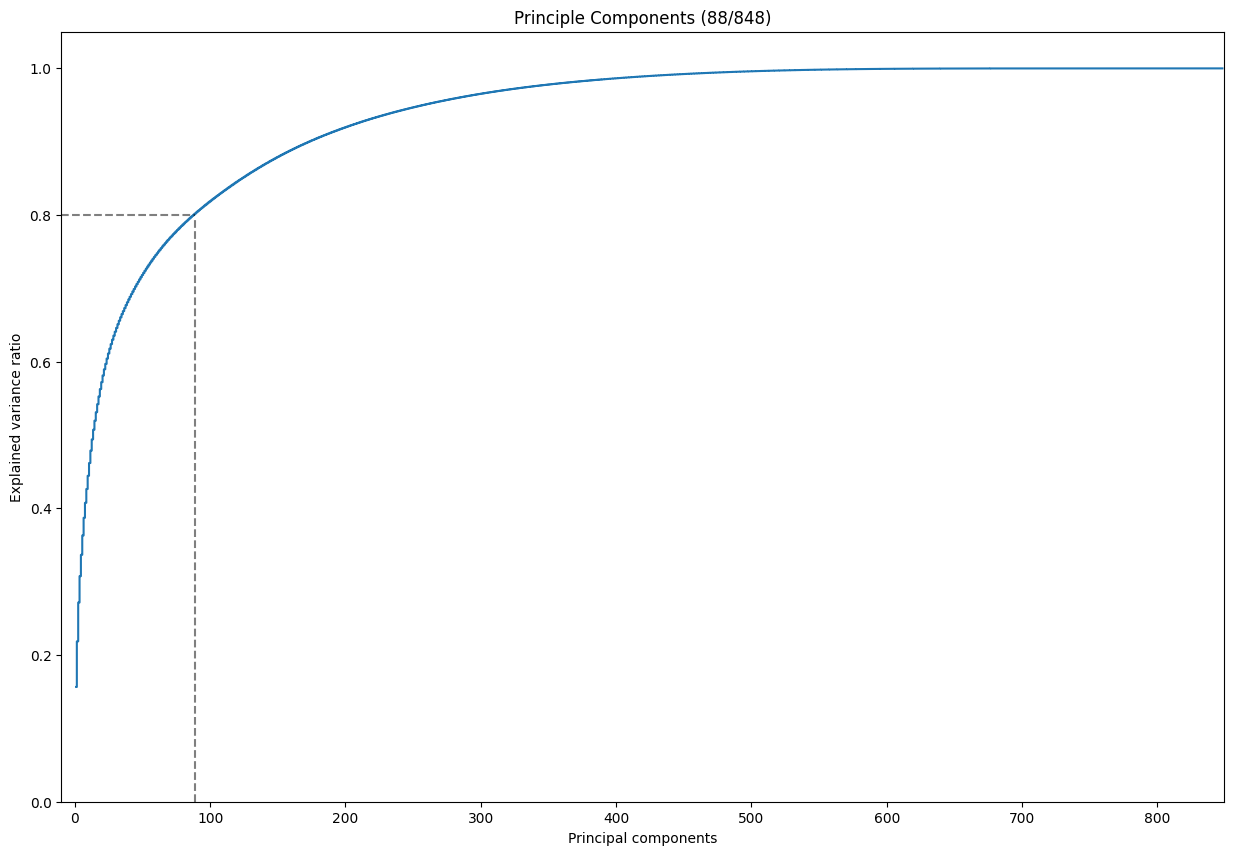

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

VARIANCE_EXPLAINED = 0.8

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)

pca = PCA(n_components=None, random_state = 0)
pca.fit(X_train_std)

pca_thesh = PCA(n_components=VARIANCE_EXPLAINED, svd_solver='full', random_state = 0)
X_train_pca = pca_thesh.fit_transform(X_train_std)

plt.figure(figsize=(15,10))
#plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, align='center')
plt.step(range(1, len(pca.explained_variance_ratio_)+1),
         np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylim(0,1.05)
plt.xlim(-10,len(pca.explained_variance_ratio_)+1)
plt.grid(False)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Principle Components (' + str(X_train_pca.shape[1])+'/'+str(len(pca.explained_variance_ratio_))+ ')')
plt.axvline(x=X_train_pca.shape[1]+.5, ymax=VARIANCE_EXPLAINED-0.04, alpha=.5, color='black', linestyle = '--')
plt.hlines(y=VARIANCE_EXPLAINED, xmin=-10, xmax =X_train_pca.shape[1]+.5, alpha=.5, color='black', linestyle = '--')

#plt.tight_layout()
#plt.savefig('Principle Components.png', dpi=300)
plt.show()

In [ ]:
from sklearn.decomposition import IncrementalPCA

n_batches = 20
inc_pca = IncrementalPCA(n_components = 80)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)
X_reduced.shape

(2512, 80)

# Kernel PCA

In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import KernelPCA

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="liblinear"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X_train_reduced, y_train)

print(grid_search.best_params_)

{'kpca__gamma': 0.03, 'kpca__kernel': 'rbf'}


In [ ]:
!pip install umap-learn[plot]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 72.8 MB/s eta 0:00:00


# UMAP - interactive visualization

In [ ]:
from umap import UMAP
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


/usr/local/lib/python3.10/dist-packages/umap/plot.py:20: UserWarning: The umap.plot package requires extra plotting libraries to be installed.
    You can install these via pip using

    pip install umap-learn[plot]

    or via conda using

     conda install pandas matplotlib datashader bokeh holoviews colorcet scikit-image
    
  warn(


ImportError: umap.plot requires pandas matplotlib datashader bokeh holoviews scikit-image and colorcet to be installed

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/driver.py", line 295, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn

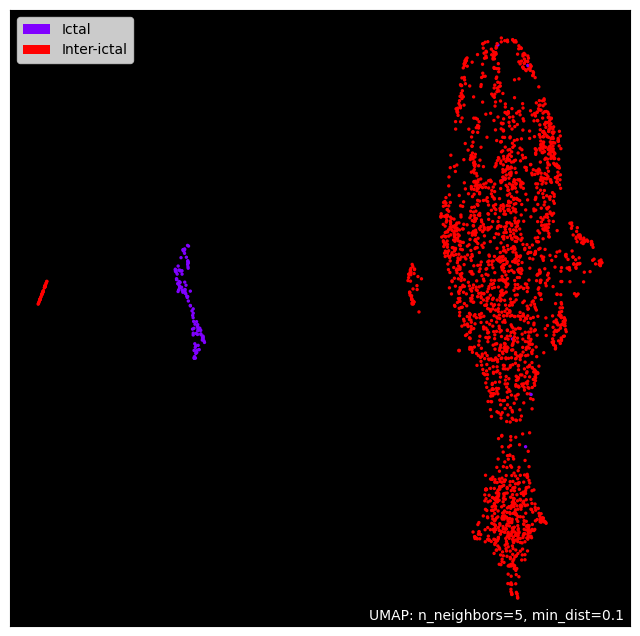

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


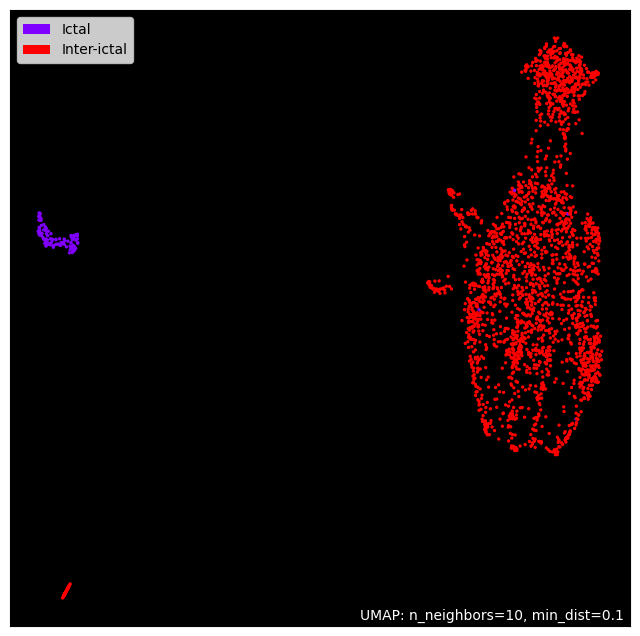

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


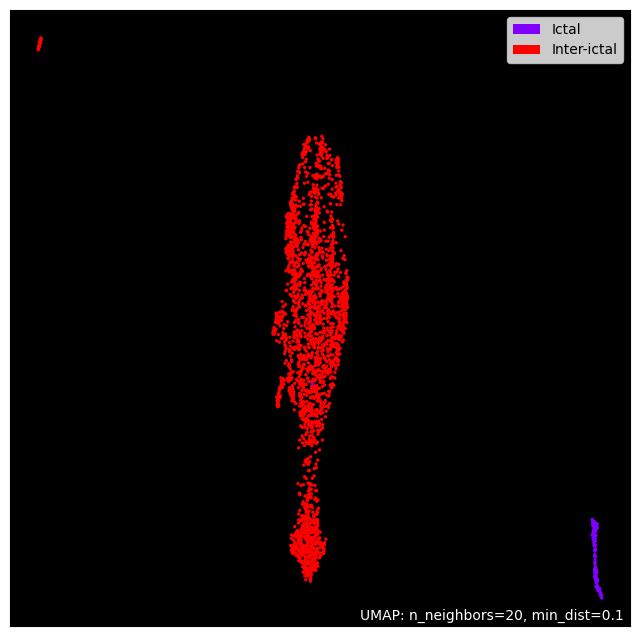

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


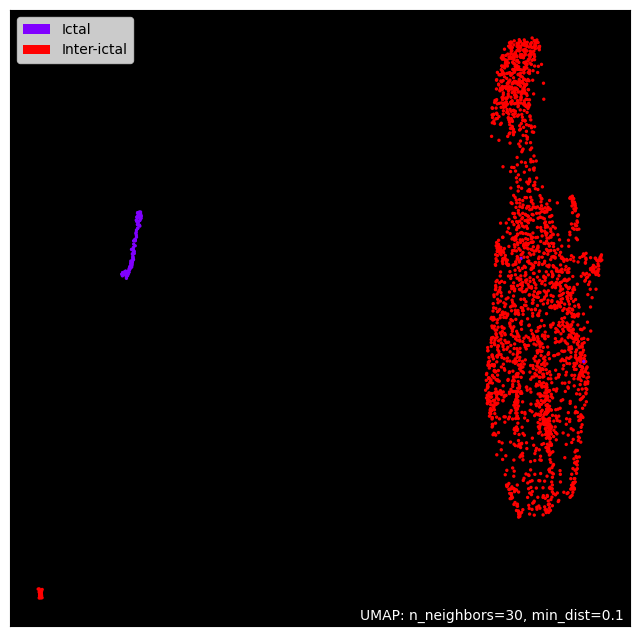

In [ ]:
import umap.plot

for neighbour in [5,10,20,30]:
    umap_pipe = Pipeline([
        ('scl', StandardScaler()),
        ('umap', UMAP(n_neighbors=neighbour,
                    random_state=RANDOM_STATE))
    ])

    umap_pipe.fit(X_train, y_train)

    ax = umap.plot.points(umap_pipe['umap'],
                        labels=np.where(y_train ==0, 'Inter-ictal', 'Ictal'),
                        theme='fire')
    plt.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


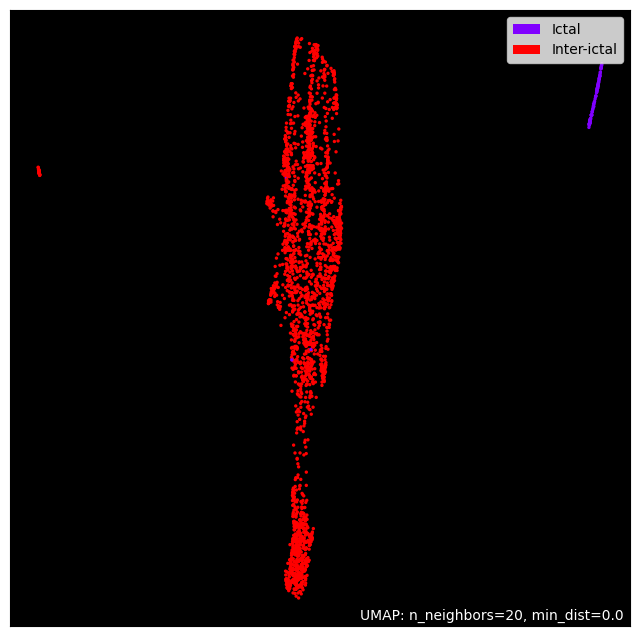

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


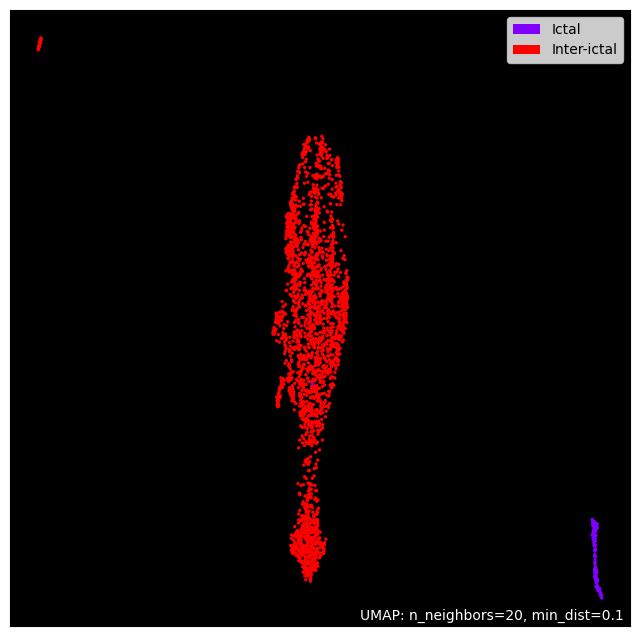

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


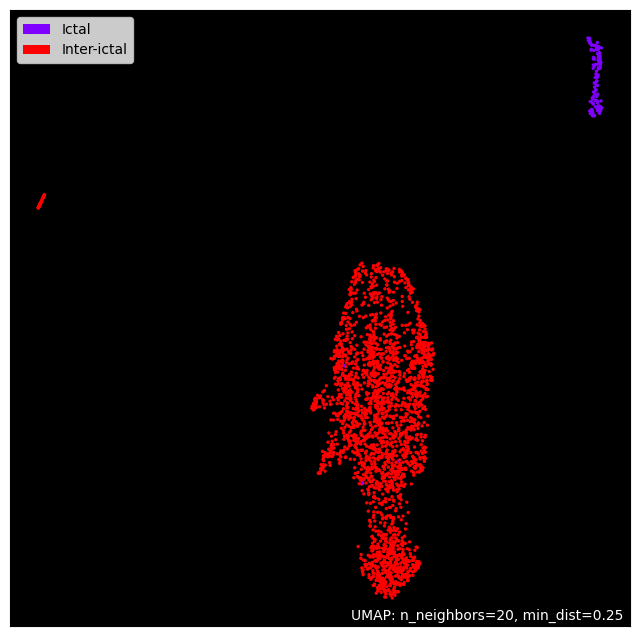

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


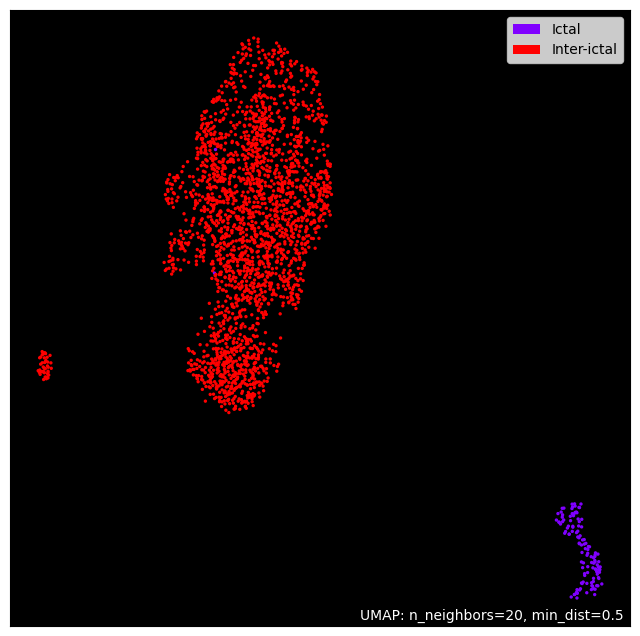

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


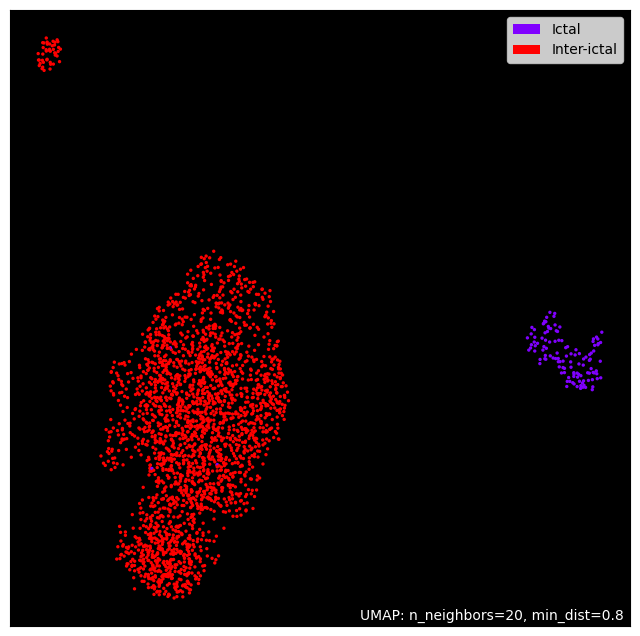

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


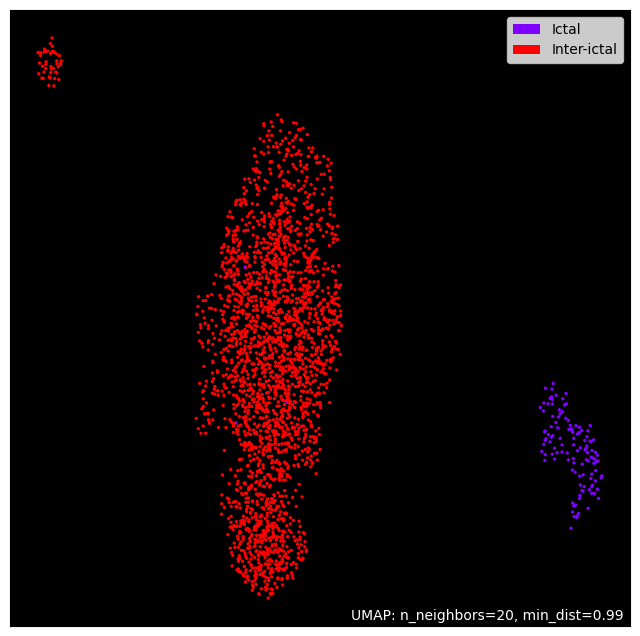

In [ ]:
for d in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
    umap_pipe = Pipeline([
        ('scl', StandardScaler()),
        ('umap', UMAP(n_neighbors=20,
                      min_dist=d,
                      random_state=RANDOM_STATE))
    ])

    umap_pipe.fit(X_train, y_train)

    ax = umap.plot.points(umap_pipe['umap'],
                        labels=np.where(y_train ==0, 'Inter-ictal', 'Ictal'),
                        theme='fire')
    plt.show()

# t-SNE

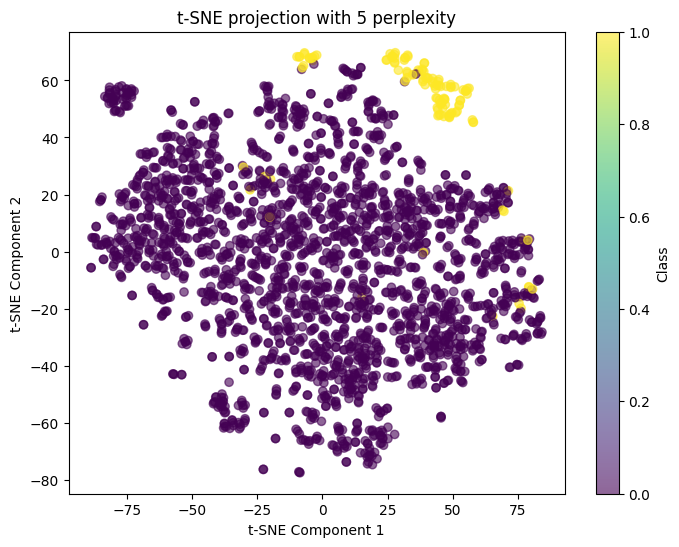

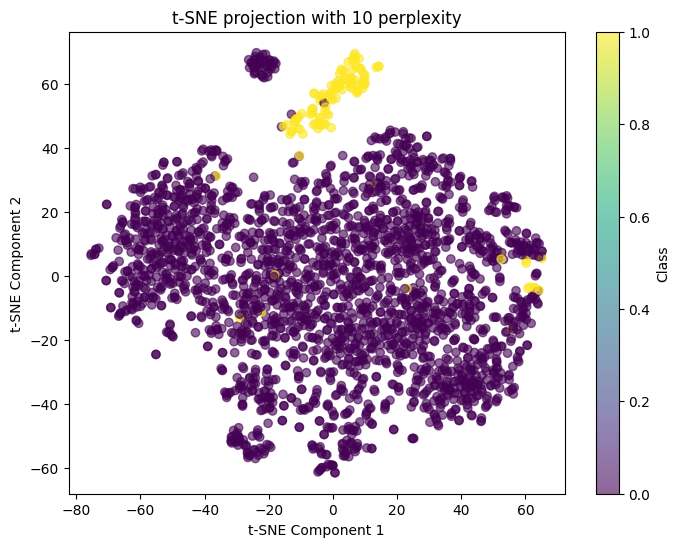

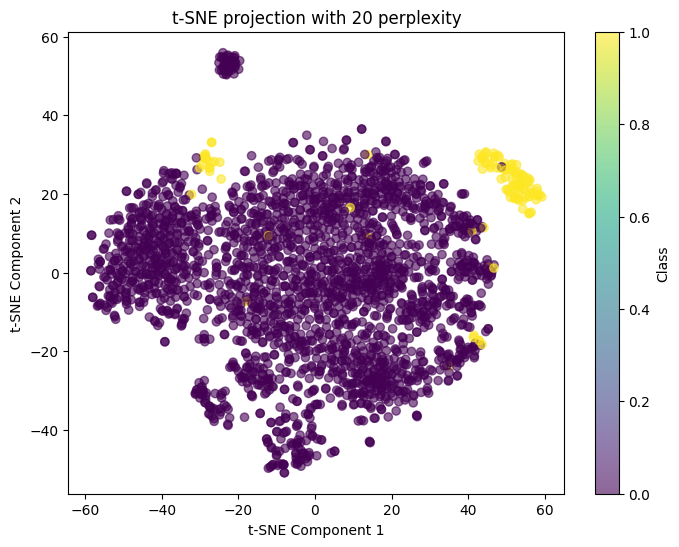

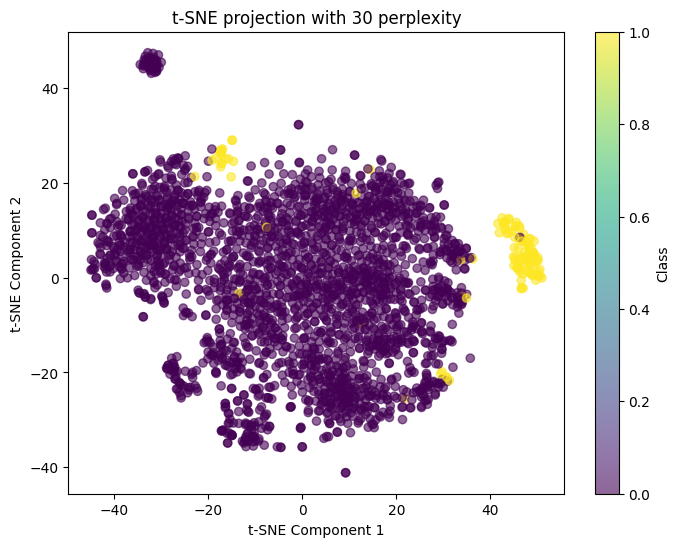

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np

# Assume RANDOM_STATE is defined elsewhere in your code (e.g., RANDOM_STATE = 42)
for perplexity in [5, 10, 20, 30]: # Change neighbour to perplexity
    tsne_pipe = Pipeline([
        ('scl', StandardScaler()),  # Scaling the features
        ('tsne', TSNE(perplexity=perplexity, random_state=RANDOM_STATE))  # t-SNE, use perplexity instead of n_neighbors
    ])

    tsne_pipe.fit(X_train, y_train)

    # t-SNE does not have a `plot` method like UMAP, so we need to manually plot it using matplotlib
    tsne_results = tsne_pipe['tsne'].embedding_

    # Plot the t-SNE results
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=y_train, cmap='viridis', alpha=0.6)

    # Add a colorbar to indicate the class
    plt.colorbar(scatter, label='Class')
    plt.title(f't-SNE projection with {perplexity} perplexity') # Update title to reflect perplexity
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()

#ISOMAP

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


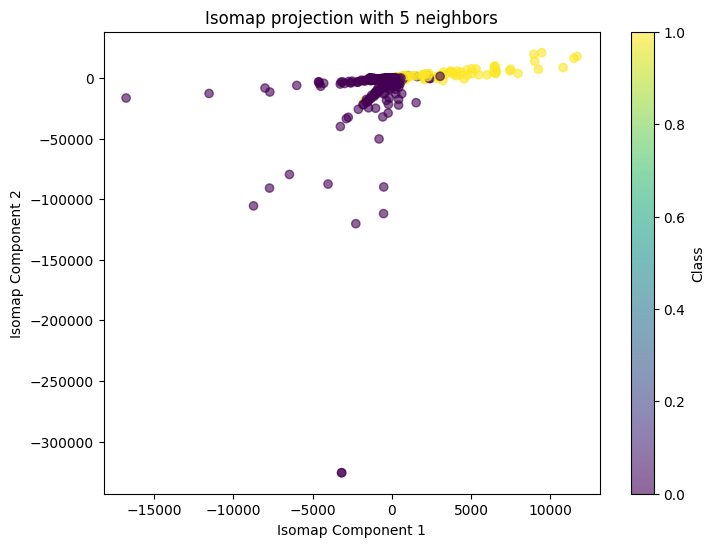

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


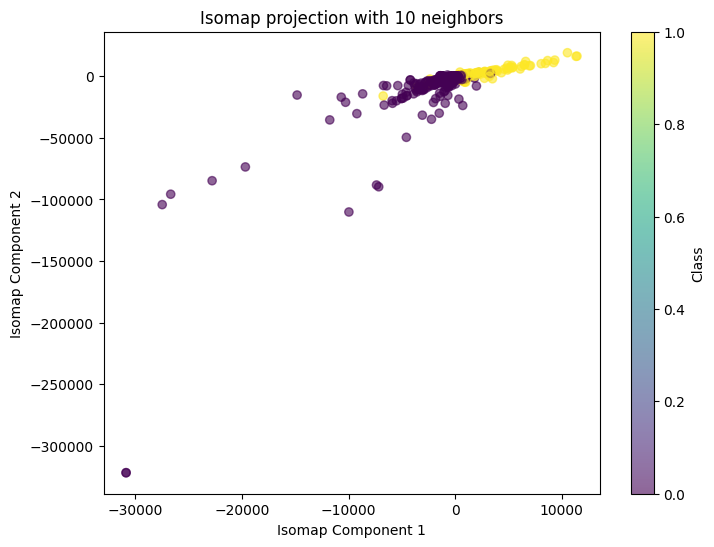

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


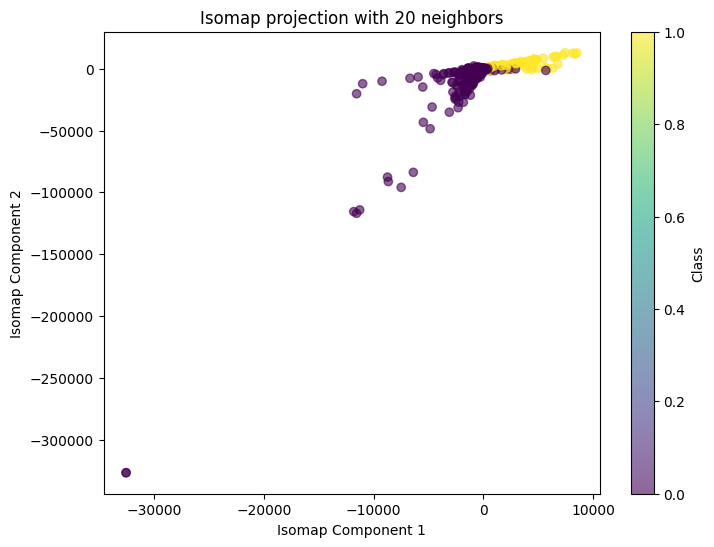

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


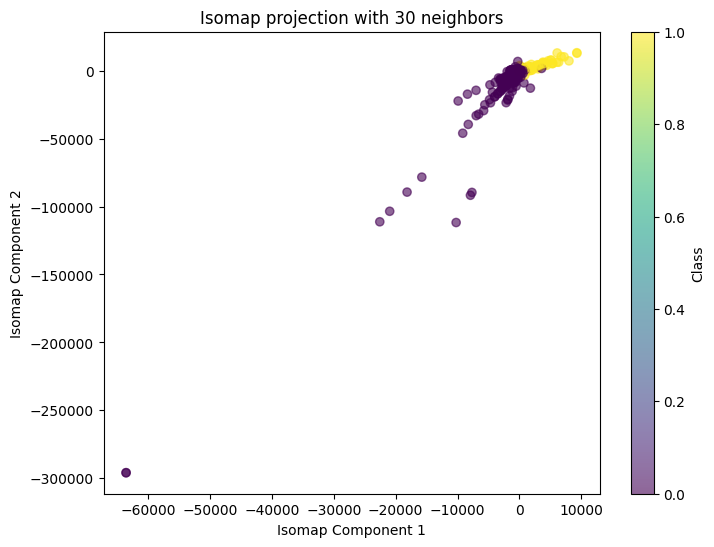

In [ ]:
from sklearn.manifold import Isomap
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np

# Assume RANDOM_STATE is defined elsewhere in your code (e.g., RANDOM_STATE = 42)
for neighbour in [5, 10, 20, 30]:
    isomap_pipe = Pipeline([
        ('scl', StandardScaler()),  # Scaling the features
        ('isomap', Isomap(n_neighbors=neighbour))  # Isomap - Remove random_state
    ])

    isomap_pipe.fit(X_train, y_train)

    # Get the Isomap embedding
    isomap_results = isomap_pipe['isomap'].transform(X_train)

    # Plot the Isomap results
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(isomap_results[:, 0], isomap_results[:, 1], c=y_train, cmap='viridis', alpha=0.6)

    # Add a colorbar to indicate the class
    plt.colorbar(scatter, label='Class')
    plt.title(f'Isomap projection with {neighbour} neighbors')
    plt.xlabel('Isomap Component 1')
    plt.ylabel('Isomap Component 2')
    plt.show()

#MDS

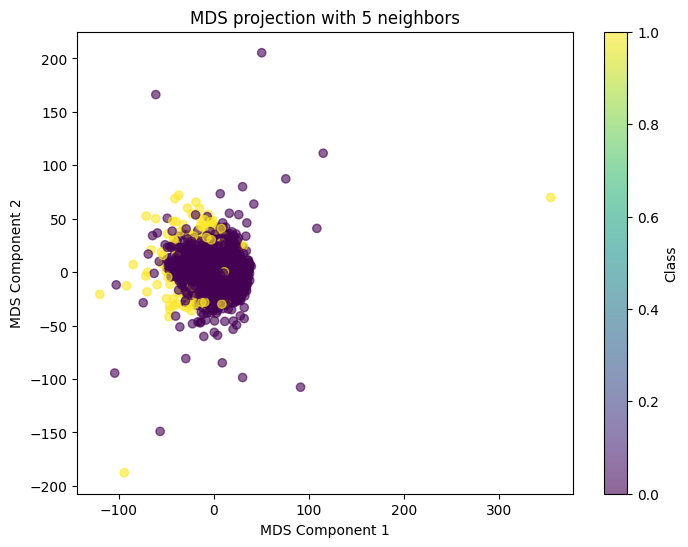

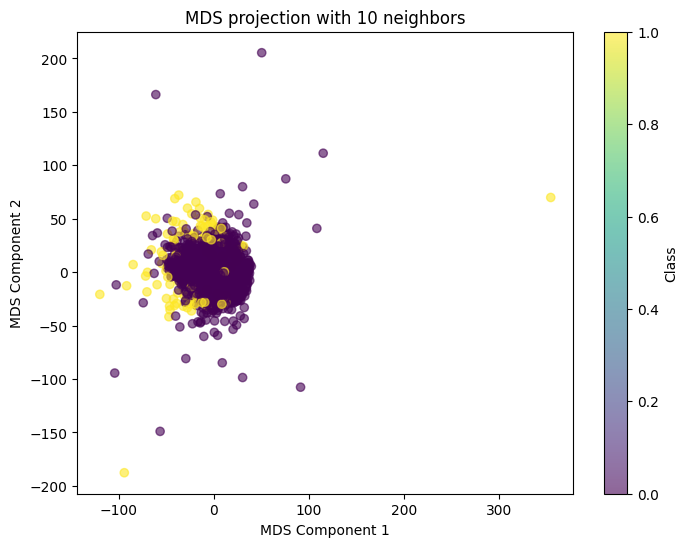

KeyboardInterrupt: 

In [ ]:
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np

# Assume RANDOM_STATE is defined elsewhere in your code (e.g., RANDOM_STATE = 42)
for neighbour in [5, 10, 20, 30]:
    mds_pipe = Pipeline([
        ('scl', StandardScaler()),  # Scaling the features
        ('mds', MDS(n_components=2, dissimilarity='euclidean', random_state=RANDOM_STATE))  # MDS
    ])

    mds_pipe.fit(X_train, y_train)

    # Get the MDS embedding (the low-dimensional representation)
    mds_results = mds_pipe['mds'].embedding_

    # Plot the MDS results
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(mds_results[:, 0], mds_results[:, 1], c=y_train, cmap='viridis', alpha=0.6)

    # Add a colorbar to indicate the class
    plt.colorbar(scatter, label='Class')
    plt.title(f'MDS projection with {neighbour} neighbors')
    plt.xlabel('MDS Component 1')
    plt.ylabel('MDS Component 2')
    plt.show()


#Factor analysis

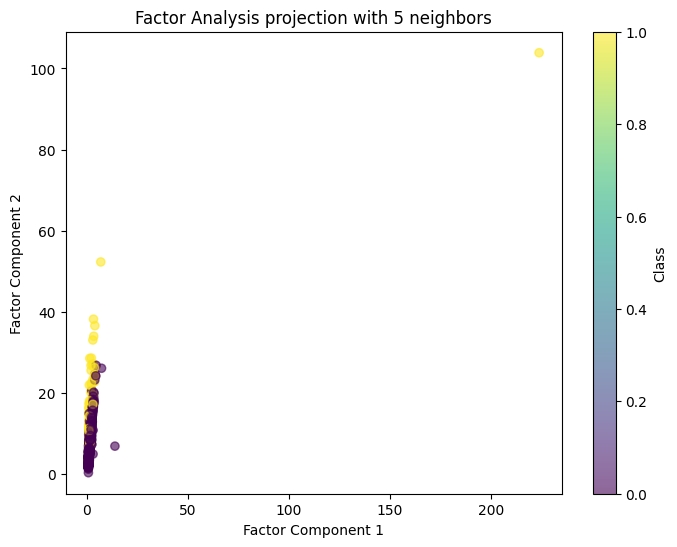

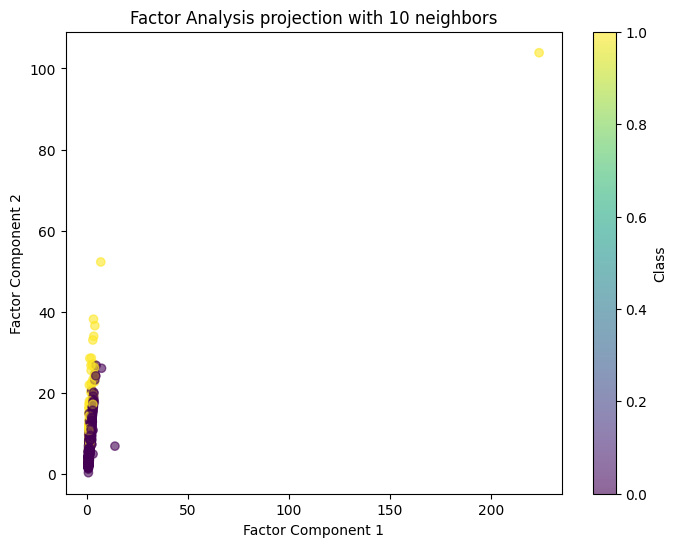

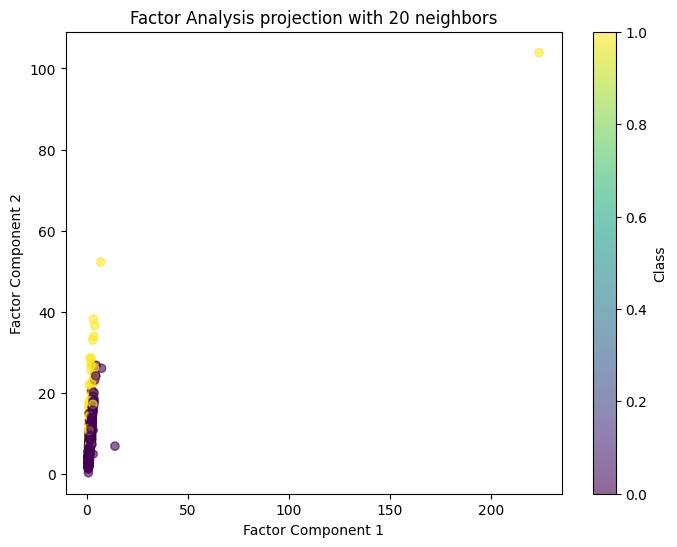

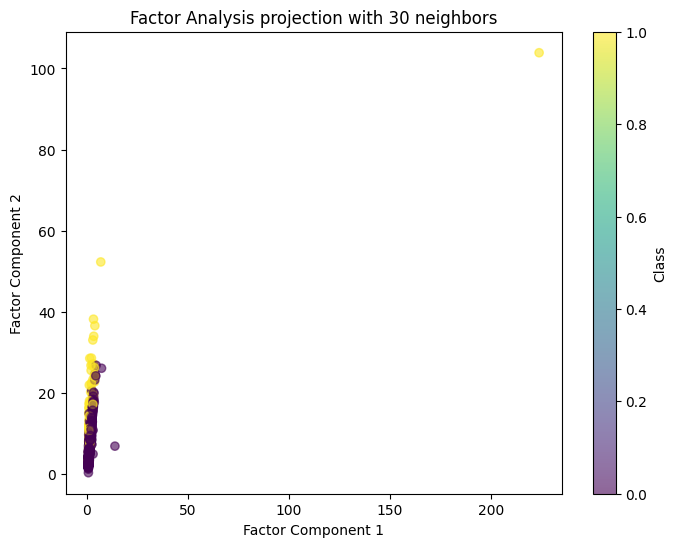

In [ ]:
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np

# Assume RANDOM_STATE is defined elsewhere in your code (e.g., RANDOM_STATE = 42)
for neighbour in [5, 10, 20, 30]:
    fa_pipe = Pipeline([
        ('scl', StandardScaler()),  # Scaling the features
        ('fa', FactorAnalysis(n_components=2, random_state=RANDOM_STATE))  # Factor Analysis
    ])

    fa_pipe.fit(X_train, y_train)

    # Get the Factor Analysis embedding (the low-dimensional representation)
    fa_results = fa_pipe['fa'].transform(X_train)

    # Plot the Factor Analysis results
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(fa_results[:, 0], fa_results[:, 1], c=y_train, cmap='viridis', alpha=0.6)

    # Add a colorbar to indicate the class
    plt.colorbar(scatter, label='Class')
    plt.title(f'Factor Analysis projection with {neighbour} neighbors')
    plt.xlabel('Factor Component 1')
    plt.ylabel('Factor Component 2')
    plt.show()


#autoencoders

In [ ]:
!pip install tensorflow


79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


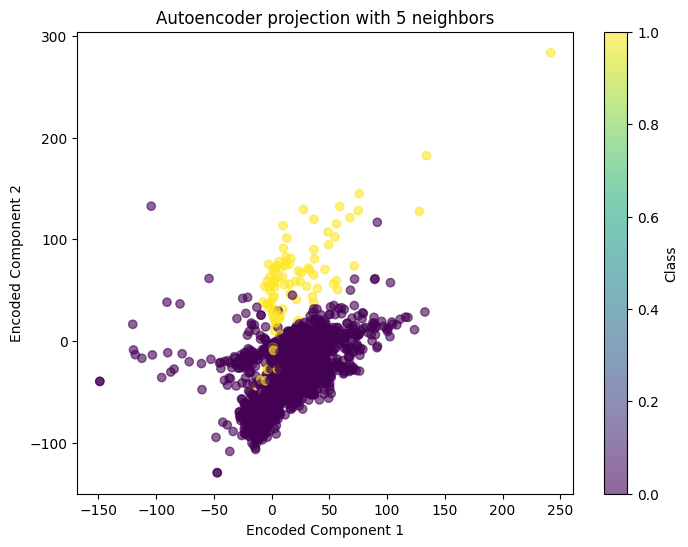

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


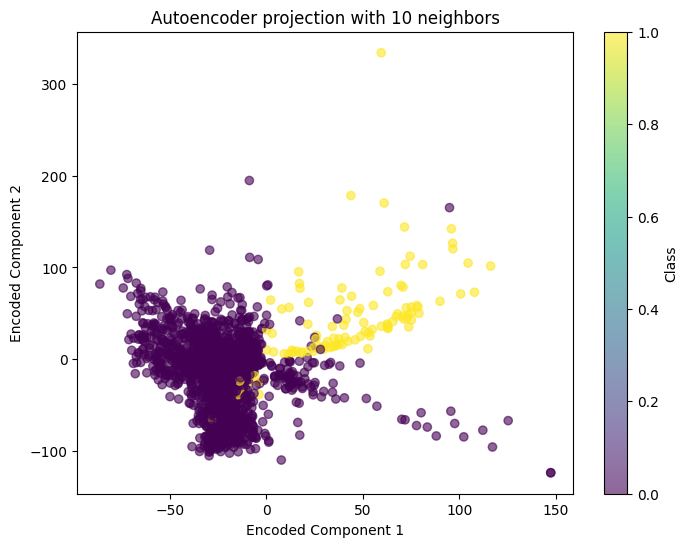

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


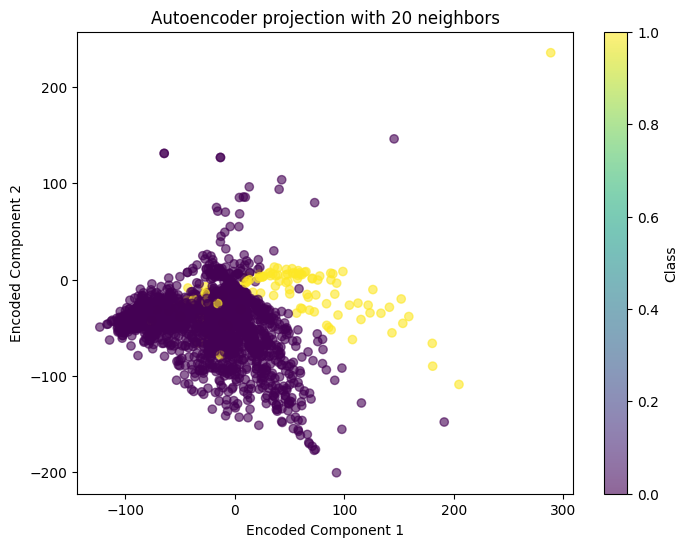

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


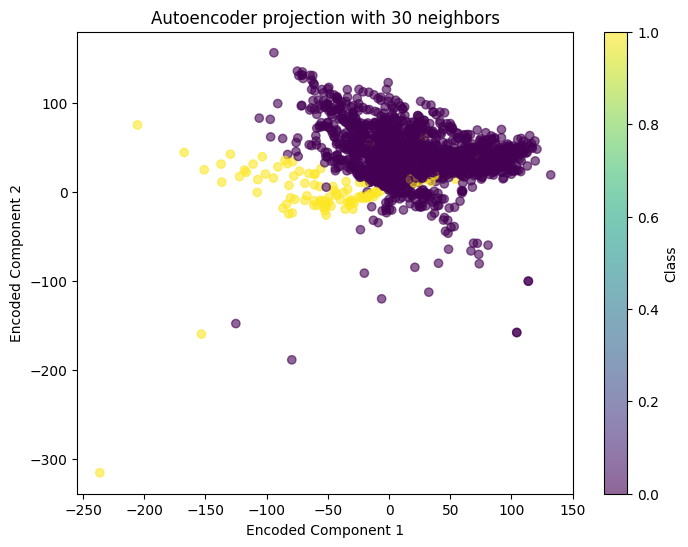

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model
import tensorflow as tf

# Define the Autoencoder Model
def create_autoencoder(input_dim, encoding_dim=2):
    # Encoder
    input_layer = layers.Input(shape=(input_dim,))
    encoded = layers.Dense(128, activation='relu')(input_layer)
    encoded = layers.Dense(64, activation='relu')(encoded)
    encoded = layers.Dense(encoding_dim, activation='linear')(encoded)  # encoding layer (2D)

    # Decoder
    decoded = layers.Dense(64, activation='relu')(encoded)
    decoded = layers.Dense(128, activation='relu')(decoded)
    decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)  # Reconstruct original input

    # Autoencoder model
    autoencoder = Model(input_layer, decoded)
    encoder = Model(input_layer, encoded)  # Encoder model to get lower-dimensional data

    autoencoder.compile(optimizer='adam', loss='mean_squared_error')

    return autoencoder, encoder

# Assume RANDOM_STATE and X_train are defined elsewhere in your code
# Here, we assume X_train has the correct shape and is scaled
for neighbour in [5, 10, 20, 30]:
    # Initialize the Autoencoder with input dimension (features) and encoding dimension
    input_dim = X_train.shape[1]
    autoencoder, encoder = create_autoencoder(input_dim, encoding_dim=2)

    # Scale the data (StandardScaler to make training easier)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Fit the Autoencoder
    autoencoder.fit(X_train_scaled, X_train_scaled, epochs=50, batch_size=256, shuffle=True, verbose=0, validation_data=(X_train_scaled, X_train_scaled))

    # Get the lower-dimensional representation of the data
    encoded_data = encoder.predict(X_train_scaled)

    # Plot the Autoencoder results (encoded 2D space)
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=y_train, cmap='viridis', alpha=0.6)

    # Add a colorbar to indicate the class
    plt.colorbar(scatter, label='Class')
    plt.title(f'Autoencoder projection with {neighbour} neighbors')
    plt.xlabel('Encoded Component 1')
    plt.ylabel('Encoded Component 2')
    plt.show()


#Randomized PCA

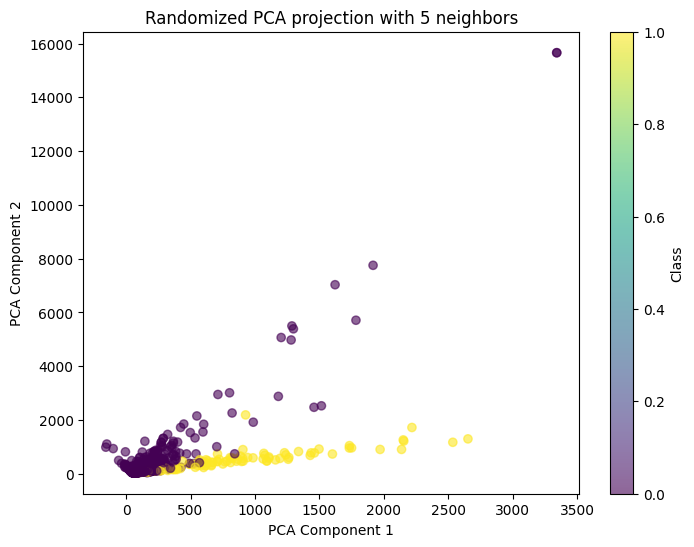

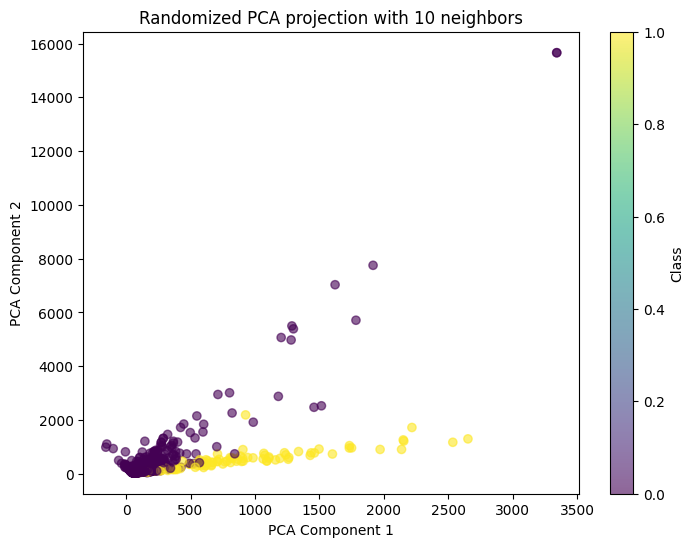

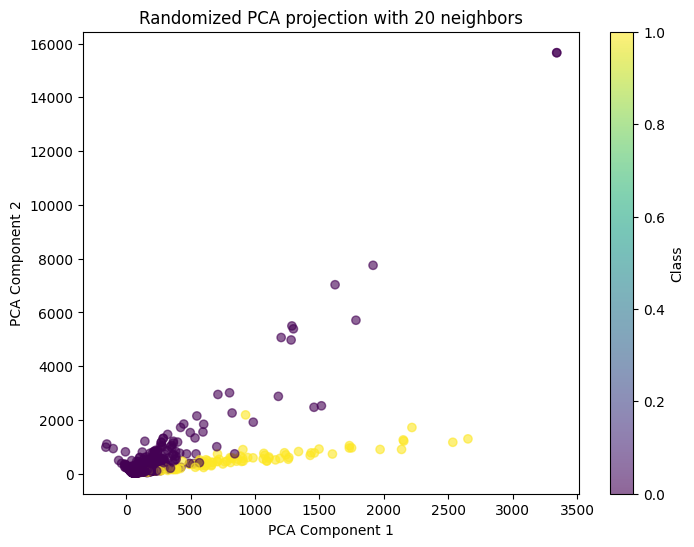

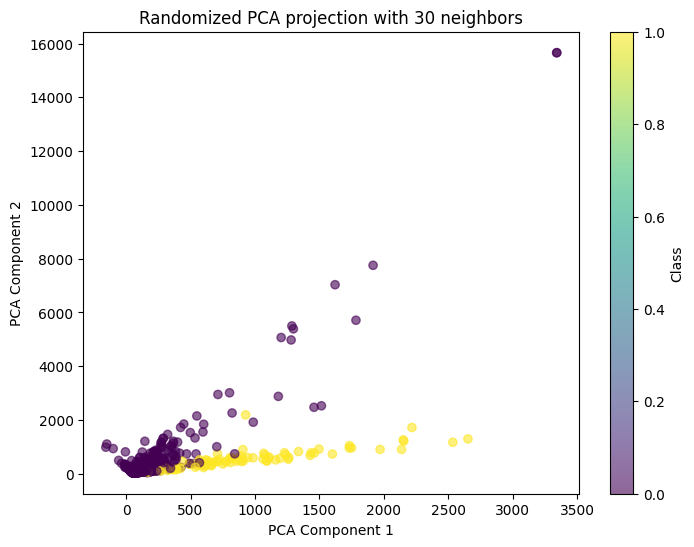

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np

# Use RandomizedPCA by setting `svd_solver='randomized'`
for neighbour in [5, 10, 20, 30]:
    # Randomized PCA with 2 components for visualization
    pca_pipe = Pipeline([
        ('scl', StandardScaler()),  # Scaling the features
        ('pca', PCA(n_components=2, svd_solver='randomized', random_state=RANDOM_STATE))  # Randomized PCA
    ])

    # Fit the Randomized PCA model
    pca_pipe.fit(X_train, y_train)

    # Get the lower-dimensional representation (2D) from PCA
    pca_results = pca_pipe['pca'].transform(X_train)

    # Plot the Randomized PCA results
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(pca_results[:, 0], pca_results[:, 1], c=y_train, cmap='viridis', alpha=0.6)

    # Add a colorbar to indicate the class
    plt.colorbar(scatter, label='Class')
    plt.title(f'Randomized PCA projection with {neighbour} neighbors')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()


#Kernel PCA

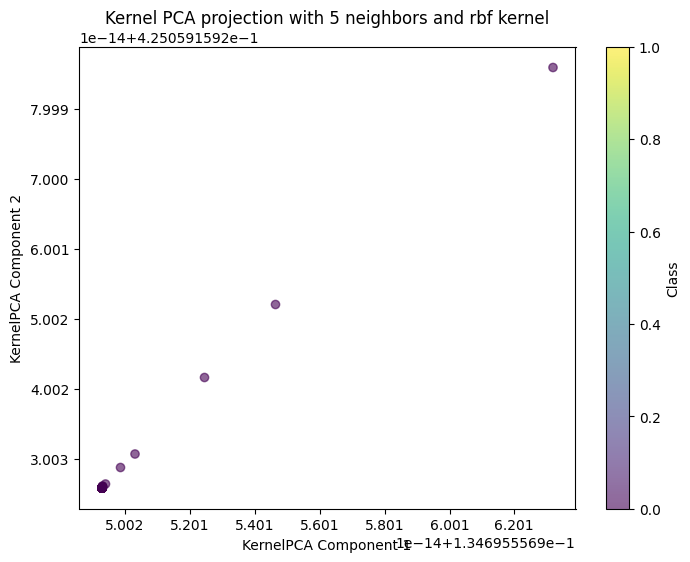

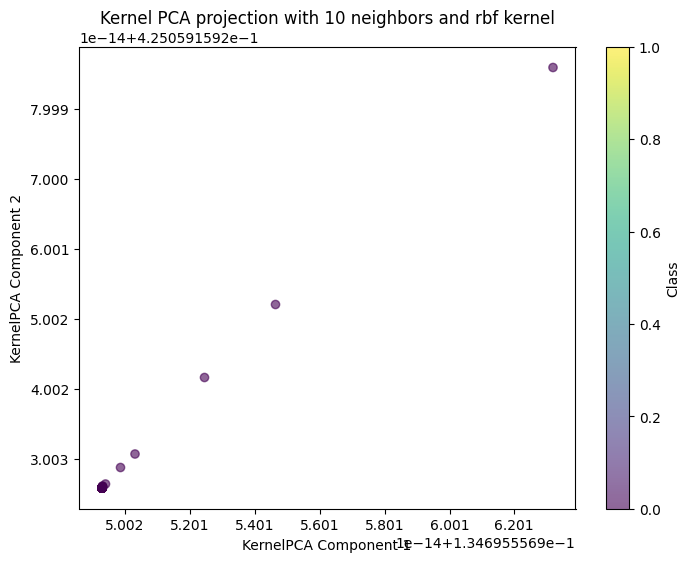

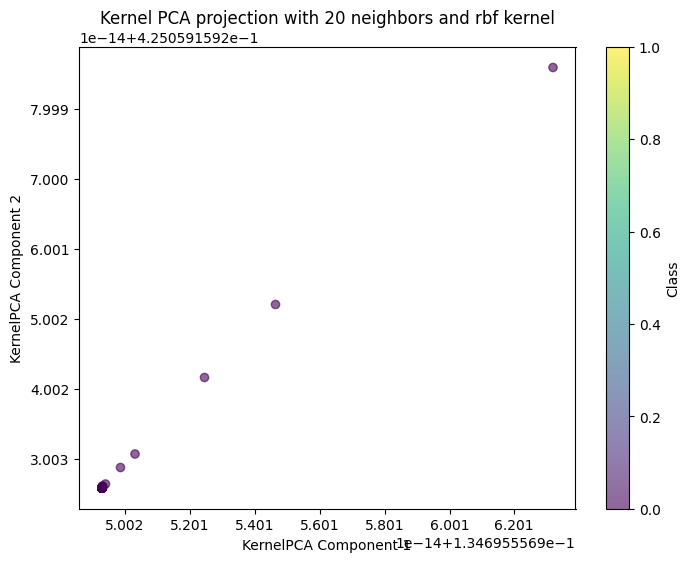

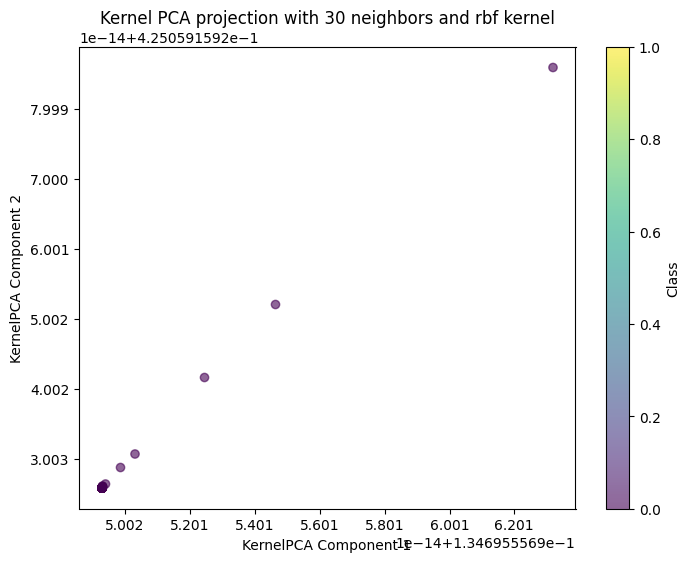

In [ ]:
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np

# Define the kernel to be used (e.g., 'rbf' for Radial Basis Function kernel)
kernel_type = 'rbf'  # You can try 'linear', 'poly', 'sigmoid', or 'rbf' for different kernels

for neighbour in [5, 10, 20, 30]:
    # KernelPCA with 2 components for visualization
    kpca_pipe = Pipeline([
        ('scl', StandardScaler()),  # Scaling the features
        ('kpca', KernelPCA(n_components=2, kernel=kernel_type, random_state=RANDOM_STATE))  # Kernel PCA
    ])

    # Fit the KernelPCA model
    kpca_pipe.fit(X_train, y_train)

    # Get the lower-dimensional representation (2D) from KernelPCA
    kpca_results = kpca_pipe['kpca'].transform(X_train)

    # Plot the KernelPCA results
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(kpca_results[:, 0], kpca_results[:, 1], c=y_train, cmap='viridis', alpha=0.6)

    # Add a colorbar to indicate the class
    plt.colorbar(scatter, label='Class')
    plt.title(f'Kernel PCA projection with {neighbour} neighbors and {kernel_type} kernel')
    plt.xlabel('KernelPCA Component 1')
    plt.ylabel('KernelPCA Component 2')
    plt.show()


# Incremental PCA

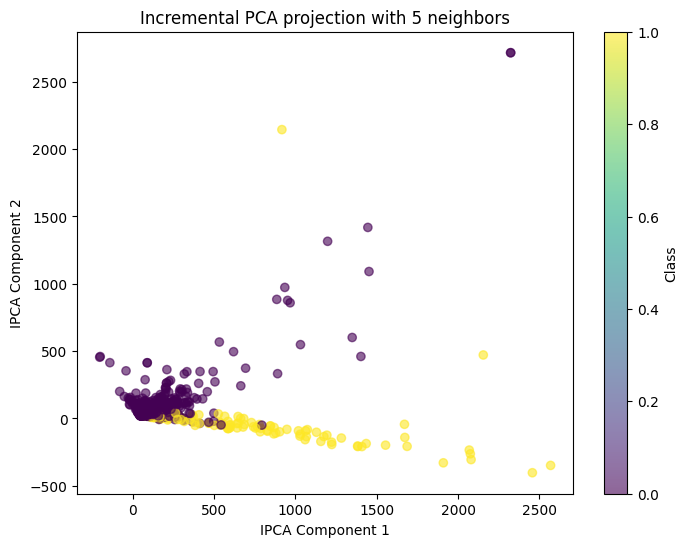

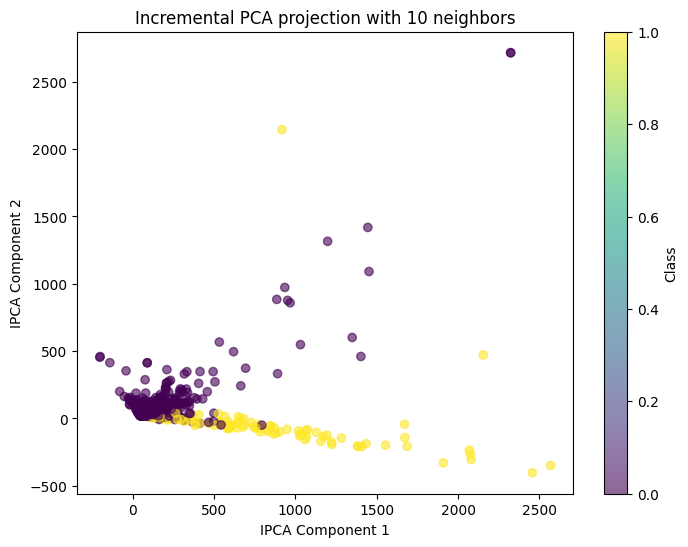

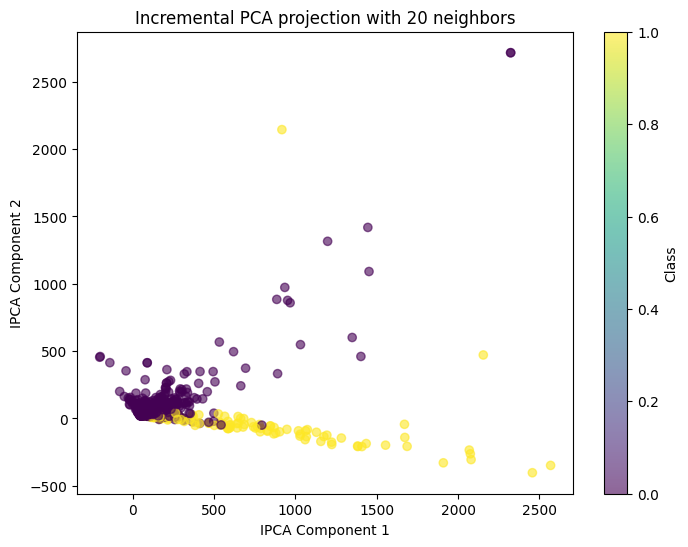

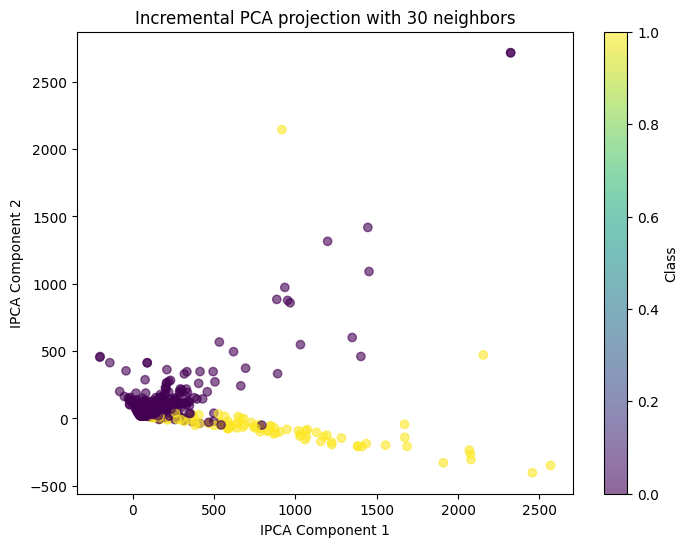

In [ ]:
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np

# IncrementalPCA with a batch size and the number of components for visualization (2 components)
batch_size = 128  # Batch size for incremental learning

for neighbour in [5, 10, 20, 30]:
    # IncrementalPCA with 2 components for visualization
    ipca_pipe = Pipeline([
        ('scl', StandardScaler()),  # Scaling the features
        ('ipca', IncrementalPCA(n_components=2, batch_size=batch_size))  # Incremental PCA
    ])

    # Fit the IncrementalPCA model
    ipca_pipe.fit(X_train)

    # Get the lower-dimensional representation (2D) from IncrementalPCA
    ipca_results = ipca_pipe['ipca'].transform(X_train)

    # Plot the IncrementalPCA results
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(ipca_results[:, 0], ipca_results[:, 1], c=y_train, cmap='viridis', alpha=0.6)

    # Add a colorbar to indicate the class
    plt.colorbar(scatter, label='Class')
    plt.title(f'Incremental PCA projection with {neighbour} neighbors')
    plt.xlabel('IPCA Component 1')
    plt.ylabel('IPCA Component 2')
    plt.show()
